In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import pylab
data = pd.read_csv('ODI-2018-better.csv')

In [6]:
print(data)

             Timestamp                      What programme are you in?  \
0                  NaN                                             NaN   
1    4/5/2018 11:22:56         Duisenberg Quantitative Risk Management   
2    4/5/2018 11:23:04                                Computer Science   
3    4/5/2018 11:23:06                              Business Analytics   
4    4/5/2018 11:23:50                                              BA   
5    4/5/2018 11:23:59   Master Computer Science: Big Data Engineering   
6    4/5/2018 11:24:34                       Drug discovery and safety   
7    4/5/2018 11:25:25                                              CS   
8    4/5/2018 11:25:25                           Computational Science   
9    4/5/2018 11:25:36                         M Financial Economtrics   
10   4/5/2018 11:25:51          MSc Bioinformatics and Systems Biology   
11   4/5/2018 11:25:54                                    Econometrics   
12   4/5/2018 11:26:10                

In [9]:
data.shape


(218, 16)

In [11]:
del data['Timestamp']

In [52]:
d = {'mu':1,'sigma':0,'no':0, 'yes':1, 'unknown':2, 'nee':0, 'ja':1, "male":0, "female":1, 'fat':0, 'slim':1, 'neither':2, 'I have no idea what you are talking about':3, 'ACHT':8, 'hoi':0}

In [53]:
dat2 = data.replace(d)

In [16]:
print(dat2)

                         What programme are you in?  \
0                                               NaN   
1           Duisenberg Quantitative Risk Management   
2                                  Computer Science   
3                                Business Analytics   
4                                                BA   
5     Master Computer Science: Big Data Engineering   
6                         Drug discovery and safety   
7                                                CS   
8                             Computational Science   
9                           M Financial Economtrics   
10           MSc Bioinformatics and Systems Biology   
11                                     Econometrics   
12                                               CS   
13                                  Bioinformatics    
14                                               AI   
15                                              EOR   
16                                   Bioinformatics   
17        

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111bf6470>]],
      dtype=object)

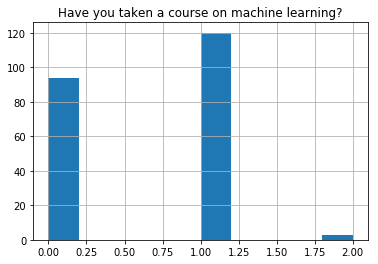

In [26]:

fig = plot.figure(figsize=(15,10))
dat2.hist(column='Have you taken a course on machine learning?')


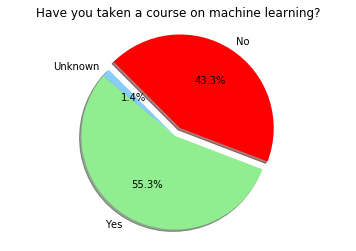

In [66]:
fig = plot.figure()

# Data to plot
labels = 'Yes', 'No', 'Unknown'
sizes = [120, 94, 3]
colors = ['lightgreen', 'red', 'lightskyblue']
explode = (0, 0.1, 0)
 
# Plot
plot.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plot.axis('equal')
plot.title ("Have you taken a course on machine learning?")
plot.show()

In [48]:
dat2

,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,Chocolate makes you.....,When is your birthday (date)?,Number of neighbors sitting around you?,Did you stand up?,"You can get £100 if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would get then?",Give a random number,Time you went to be Yesterday,What makes a good day for you (1)?,What makes a good day for you (2)?
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Duisenberg Quantitative Risk Management,0.0,0,1.0,0.0,0.0,2.0,10/12/1994,49000,0.0,0.05,7,1,Productive,Good sleep
2,Computer Science,0.0,0,2.0,1.0,0.0,3.0,06-08-1993,100,1.0,The formmer,394749,1 a m,got a 8.5,got 2 8.5s
3,Business Analytics,1.0,1,0.0,1.0,0.0,2.0,25 december 92,5,0.0,Not enough,6,23,Food,Sport
4,BA,1.0,1,1.0,1.0,0.0,3.0,01-02-1995,2,0.0,0,8,0.3,-,-
5,Master Computer Science: Big Data Engineering,0.0,0,0.0,1.0,0.0,3.0,09.01.1994,6,0.0,0,8,0:00,sleep,beer
6,Drug discovery and safety,0.0,0,1.0,0.0,0.0,0.0,17-08-1994,4,0.0,100,No,09:00,Chocolate,Doing nothing
7,CS,1.0,1,1.0,0.0,0.0,2.0,27-09-1993,5,0.0,£1,6739,2300,Chocolate,More chocolate
8,Computational Science,0.0,0,1.0,1.0,0.0,0.0,14 May 1994,5,1.0,0.25,3,12,Sunshine,Friends
9,M Financial Economtrics,0.0,0,1.0,0.0,0.0,2.0,11-04-1931,2,0.0,"0,25 pond",78952097,1 AM,Sun,Rain


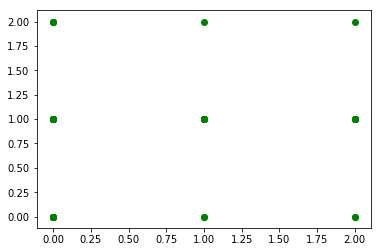

In [57]:
x = dat2['Did you stand up?']
y = dat2['Have you taken a course on statistics?']
plot.scatter(x,y, color='green')
plot.show()

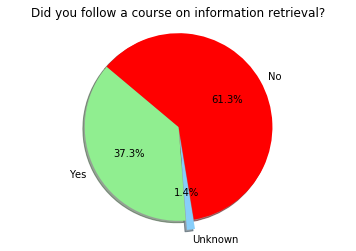

In [70]:
fig = plot.figure()

# Data to plot
labels = 'Yes', 'Unknown', 'No'
sizes = [81, 3, 133]
colors = ['lightgreen', 'lightskyblue', 'red']
explode = (0, 0.1, 0)
 
# Plot
plot.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plot.axis('equal')
plot.title ("Did you follow a course on information retrieval?")
plot.show()

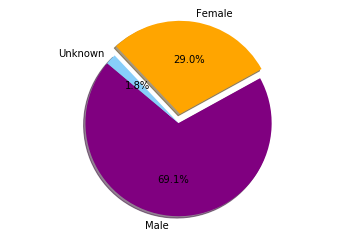

In [5]:
fig = plot.figure()

# Data to plot
labels = 'Male', 'Female', 'Unknown'
sizes = [150, 63, 4]
colors = ['purple', 'orange', 'lightskyblue']
explode = (0, 0.1, 0)
 
# Plot
plot.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plot.axis('equal')
plot.show()

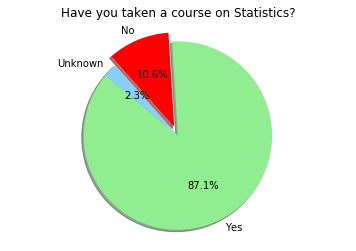

In [73]:
fig = plot.figure()

# Data to plot
labels = 'Yes', 'No', 'Unknown'
sizes = [189, 23, 5]
colors = ['lightgreen', 'red', 'lightskyblue']
explode = (0, 0.1, 0)
 
# Plot
plot.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plot.axis('equal')
plot.title ("Have you taken a course on Statistics?")
plot.show()

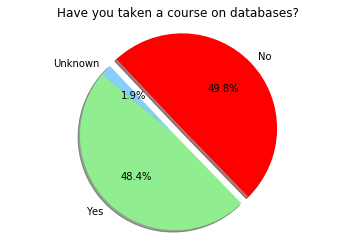

In [74]:
fig = plot.figure()

# Data to plot
labels = 'Yes', 'No', 'Unknown'
sizes = [104, 107, 4]
colors = ['lightgreen', 'red', 'lightskyblue']
explode = (0, 0.1, 0)
 
# Plot
plot.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plot.axis('equal')
plot.title ("Have you taken a course on databases?")
plot.show()

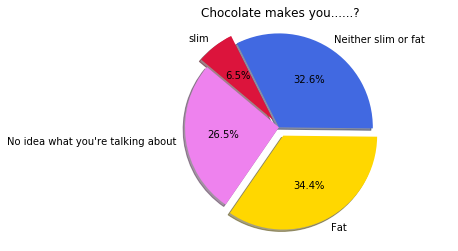

In [80]:
fig = plot.figure()

# Data to plot
labels = "No idea what you're talking about", 'Fat', 'Neither slim or fat','slim'
sizes = [57, 74, 70,14]
colors = ['violet', 'gold', 'royalblue','crimson']
explode = (0, 0.1, 0,0.1)
 
# Plot
plot.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plot.axis('equal')
plot.title ("Chocolate makes you......?")
plot.show()